<h1 style="color:rgb(0,120,170)">Assignment 6: Factor Analysis</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1 (20 Points): Prove the following Lemma</h2>

Show that for any matrix $X$ and any differentiable scalar-valued function $f$ it holds that 
$$
\frac{\partial f(X^\top X)}{\partial X} = 2{X}\frac{\partial f(X^\top X)}{\partial (X^\top X)}.

**Solution:**

$$X^\top X = \left[x_1, x_2, \ldots, x_n\right] \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$$

$$= \left[x_1x_1 + x_2x_2 + \ldots + x_nx_n\right]$$

$$= \left[\sum_{i=1}^{n} x_i^2\right]$$

Finding the derivative of $f(X^\top X)$ with respect to $X$ (taking the dot product as a scalar):

$$\frac{\partial f(X^\top X)}{\partial X} = \frac{\partial f\left(\sum_{i=1}^{n} x_i^2\right)}{\partial X}$$

Applying the chain rule, we get:

$$\frac{\partial{f(g(x))}}{\partial{x}} = \frac{\partial{f(g(x))}}{\partial{g(x)}} \frac{\partial{g(x)}}{\partial{x}}$$

$$= \frac{\partial{f(g(x))}}{\partial{g(x)}} \frac{\partial{\sum_{i=1}^{n} x_i^2}}{\partial{X}}$$

$$\frac{\partial{\sum_{i=1}^{n} x_i^2}}{\partial{X}} = \left[\frac{\partial{x_1^2}}{\partial{x}}, \frac{\partial{x_2^2}}{\partial{x}}, \ldots, \frac{\partial{x_n^2}}{\partial{x}}\right]$$

$$= \left[2x_1, 2x_2, \ldots, 2x_n\right]$$

$$= 2\left[x_1, x_2, \ldots, x_n\right]$$

$$= 2X$$

<h2 style="color:rgb(0,120,170)">Task 2 (25 Points): Derive GD for FA</h2>

Construct the negative log-likelihood $\ell(\mathbf{U}, \mathbf{\Psi}) = -\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})$, according to the FA model assumptions and show that its gradients with respect to the model parameters are 
$$
\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi}) = 2 \mathbf{P}\mathbf{U}
$$
and
$$
\nabla_{\mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \operatorname{diag}(\mathbf{P})
$$
, where 
$$
\mathbf{P} = \nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \frac12 \mathbf{Q} - \frac{1}{2n} \mathbf{Q} \mathbf{X}^\top \mathbf{X} \mathbf{Q}
$$
and
$$
\mathbf{Q} = (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1}.
$$ 

Hint: use the fact that if $f(\mathbf{A})=f(\mathbf{A}^T)$ holds for a scalar function $f$ and a real square matrix $\mathbf{A}$ it holds that $\nabla_{\mathbf{X}} f(\mathbf{X}^\top \mathbf{X}) = 2 \mathbf{X} \nabla_{\mathbf{X}^\top \mathbf{X}} f(\mathbf{X}^\top \mathbf{X})$.

FA model assumptions:

$$ x|y \sim \mathcal{N}(\mathbf{U}y, \mathbf{\Psi})$$

$$ y \sim \mathcal{N}(0, \mathbf{I})$$



**Solution:**

Finding the negative log-likelihood using the determinant of the covariance matrix:
$$-\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi}) = \frac{m}{2}\log(2\pi) + \frac{1}{2}\log|\Psi + UU^\top| + \frac{1}{2n}\sum_{i=1}^{n}(x_i^\top x_i (\Psi + UU^\top)^{-1}$$

Finding the gradient of the negative log-likelihood with respect to $UU^\top + \Psi$ (taking $UU^\top + \Psi$ as $Q$):
$$\nabla_{Q} \ell(U, \Psi) = \frac{1}{2} Q^{-1} - \frac{1}{2} Q^{-1} \left(\frac{1}{n} \sum_{i=1}^{n} x_i x_i^\top\right) Q^{-1}$$

Taking the derivative of the negative log-likelihood w.r.t. to $U$ and $\Psi$:

$U$ part:

$$\nabla_{U} \ell(U, \Psi) = \nabla_{U} (UU^\top + \Psi) \nabla_{Q} \ell(U, \Psi)$$

Using vector notation:

if $i = j = k$:
$$\nabla_{U} \ell(U, \Psi) = 2U \nabla_{Q} \ell(U, \Psi)$$ 

If $j = k$:
$$\nabla_{U} \ell(U, \Psi) = U \nabla_{Q} \ell(U, \Psi)$$

If $i = k$:
$$\nabla_{U} \ell(U, \Psi) = U \nabla_{Q} \ell(U, \Psi)$$

Else:
$$\nabla_{U} \ell(U, \Psi) = 0$$

$\Psi$ part:

Because the derivatives of the non-diagonal elements of $\Psi$ are zero, we get:

$$\nabla_{\Psi} \ell(U, \Psi) = \text{diag}(\nabla_{Q} \ell(U, \Psi))$$

<h2 style="color:rgb(0,120,170)">Task 3 (20 Points): Generate toy data for FA</h2>

Generate an $n \times m$ data matrix $\mathbf{X}$, i.e. $n=100$ samples with $m=5$ features, according to the generative factor analysis model with $l=3$ factors. Further, fill $\mathbf{U}$ with random integers from the set $\{-3, \dots, 3\}$ and $\mathbf{\Psi}$ with random integers from the set $\{1, \dots, 3\}$. To save memory, implement $\mathbf{\Psi}$ as a vector. 

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

n = 100
m = 5
l = 3

U = np.random.randint(-3, 4, (m, l)) #factor loading matrix 5 x 3
psi = np.random.randint(1, 4, m) #noise covariance matrix m x m, use as vector
y = np.random.normal(0, 1, l) #latent variables
epsilon = np.random.multivariate_normal(np.zeros(m), np.diag(psi), n)
X = U @ y + epsilon

In [38]:
# parameter shapes and conditions
# model
display(Math(r'X = U y + \epsilon'))
display(Math(r'U = \begin{bmatrix} u_{11} & u_{12} & \cdots & u_{1l} \\ u_{21} & u_{22} & \cdots & u_{2l} \\ \vdots & \vdots & \ddots & \vdots \\ u_{m1} & u_{m2} & \cdots & u_{ml} \end{bmatrix}'))

# U
display(Math(r'U \in \mathbb{R}^{m \times l}'))
display(Math(r'\epsilon \sim \mathcal{N}(0, \Psi)'))
display(Math(r'\Psi = \begin{bmatrix} \psi_1 & 0 & \cdots & 0 \\ 0 & \psi_2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \psi_m \end{bmatrix}'))

# psi
display(Math(r'\Psi \in \mathbb{R}^{m \times m}'))

# y
display(Math(r'y \in \mathbb{R}^{l}'))
display(Math(r'y \sim \mathcal{N}(0, I)'))

# x
display(Math(r'x \in \mathbb{R}^{m}'))
display(Math(r'x | y \sim \mathcal{N}(U y, \Psi)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<h2 style="color:rgb(0,120,170)">Task 4 (20 Points): Implement GD for FA</h2>

Use your results from the previous task to implement gradient descent on the negative log-likelihood for factor analysis. Initialize $\mathbf{U}$ and $\mathbf{\Psi}$ randomly uniform in $[-0.1, 0.1]$. To speed up computations, use the matrix inversion lemma $(\mathbf{UU}^\top + \mathbf{\Psi})^{-1} = \mathbf{\Psi}^{-1} - \mathbf{\Psi}^{-1}\mathbf{U}(\mathbf{I} + \mathbf{U^\top \mathbf{\Psi}^{-1} \mathbf{U}})^{-1}\mathbf{U}^\top \mathbf{\Psi}^{-1}$ wherever possible and adjust the learning rate properly. Visualize the learning progress over 100 update steps in terms of the loss function $\ell(\mathbf{U},\mathbf{\Psi})$ for 10 runs which differ only by initialization.

In [39]:
#GD for FA
display(Math(r'Q = \Psi^{-1} - \Psi^{-1} U (I + U^T \Psi^{-1} U)^{-1}  U^T \Psi^{-1}'))
display(Math(r'P = \frac{1}{2}  Q - \frac{1}{2n} Q X^T X Q'))
display(Math(r'\nabla_U = 2 P \cdot U'))
display(Math(r'\nabla_{\Psi} = \text{diag}(P)'))
display(Math(r'U = U - (lr \nabla_U)'))
display(Math(r'\Psi = \Psi - (lr \nabla_{\Psi})'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

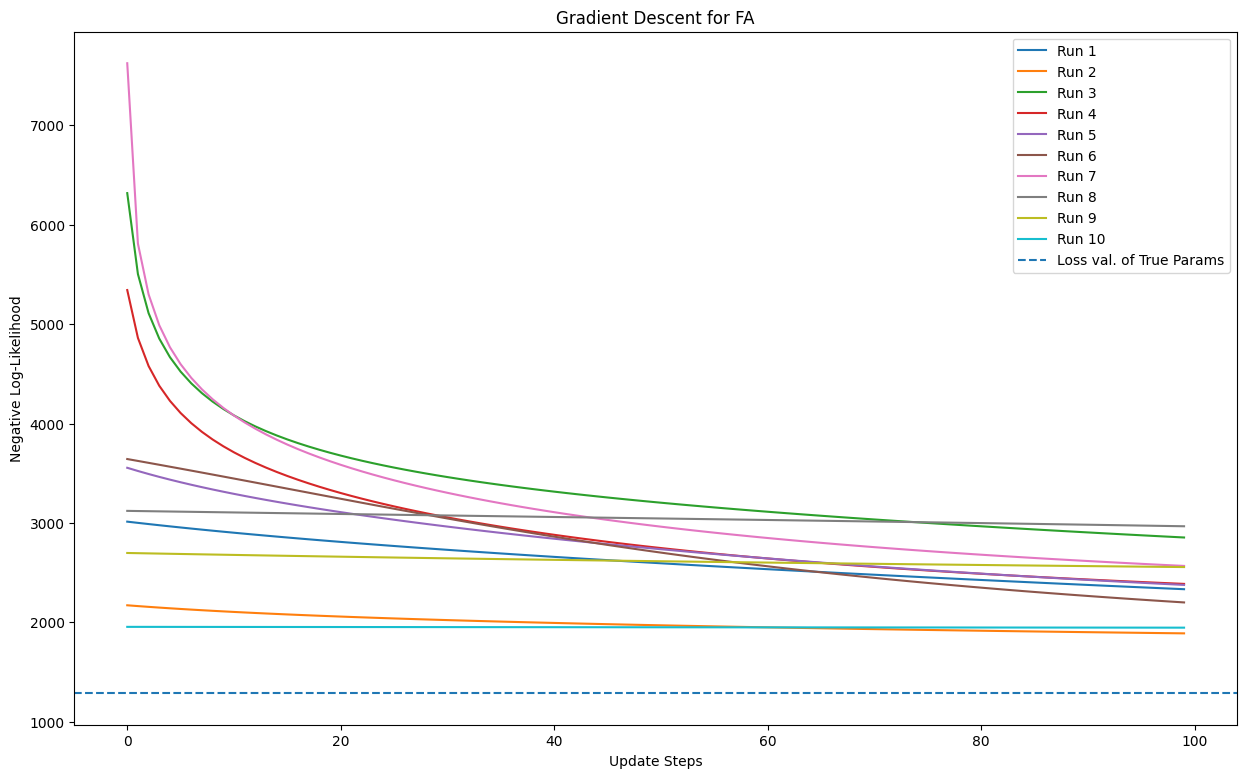

In [41]:
U_true = np.random.uniform(-3, 4, (m, l))
psi_true = np.random.uniform(1, 4, m)
y = np.random.normal(0, 1, l)
epsilon = np.random.multivariate_normal(np.zeros(m), np.diag(psi_true), n)
X = U_true @ y + epsilon

losses_all_runs = []
for run in range(10):
    U = np.random.uniform(-0.1, 0.1, (m, l))
    psi = np.random.uniform(-0.1, 0.1, m)

    losses = []
    for update_step in range(100):
        psi_inv = np.linalg.inv(np.diag(psi))
        #Speed up eq. 5.41
        Q = psi_inv - psi_inv @ U @ np.linalg.inv(np.eye(l) + U.T @ psi_inv @ U) @ U.T @ psi_inv
        P = 1/2 * Q - ((1 / (2 * n)) * Q @ X.T @ X @ Q)

        gradient_U = 2 * (P @ U)
        gradient_psi = np.diag(P)

        U = U - 0.001 * gradient_U
        psi = psi - 0.001 * gradient_psi
        
        U_Ut_psi = U @ U.T + np.diag(psi)

        loss_sum = []
        for x in X:
            exp_term = np.exp(-1 / 2 * (x.T @ np.linalg.inv(U_Ut_psi) @ x))
            #Neg. log-likelihood
            loss = -np.log((2 * np.pi) ** (-m / 2) * abs(np.linalg.det(U_Ut_psi)) ** (-1 / 2) * exp_term)
            loss_sum.append(loss)

        losses.append(np.sum(loss_sum))

    losses_all_runs.append(losses)

plt.figure(figsize=(15, 9))
for losses in losses_all_runs:
    plt.plot(losses)

U_Ut_psi_true = U_true @ U_true.T + np.diag(psi_true)

loss_sum = []
for x in X:
    exp_term = np.exp(-1 / 2 * (x.T @ np.linalg.inv(U_Ut_psi_true) @ x))
    loss = -np.log((2 * np.pi) ** (-m / 2) * abs(np.linalg.det(U_Ut_psi_true)) ** (-1 / 2) * exp_term)
    loss_sum.append(loss)

plt.axhline(y=np.sum(loss_sum), linestyle='--')
plt.legend(['Run ' + str(i) for i in range(1, 11)] + ['Loss val. of True Params'])
plt.xlabel('Update Steps')
plt.ylabel('Negative Log-Likelihood')
plt.title('Gradient Descent for FA')
plt.show()



<h2 style="color:rgb(0,120,170)">Task 5 (20 Points): Implement EM for FA</h2>

Implement expectation maximization for factor analysis. Use the same data and initialization scheme as in the previous task. Visualize the learning progress over 100 update steps in terms of the loss function $\ell(\mathbf{U},\mathbf{\Psi})$ for 10 runs which differ only by initialization. Compare your results to those in the previous exercise and interpret the ovserved differences. 

Use Speedups from lecture notes!

In [43]:
#EM for FA
display(Math(r'x \sim \mathcal{N}(0, U U^T + \Psi)'))

#Matrix inversion lemma
display(Math(r'(U U^{T} + \Psi)^{-1} = \Psi^{-1} - \Psi^{-1} U (I + U^T \Psi^{-1} U) U^T \Psi^{-1}'))

#E-step
display(Math(r'U = \frac{1}{n} \left( \sum_{i=1}^{n} x_i E_{y|x_i}[y]^T \right) \left(\frac{1}{n} \sum_{i=1}^{n} E_{y|x_i}[y y^T] \right)^{-1}'))

#M-step
display(Math(r'\Psi = \frac{1}{n} \text{diag}(\sum_{i=1}^{n} x_i x_i^T - \sum_{i=1}^{n} x_i E_{y|x_i}[y]^T U^T)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

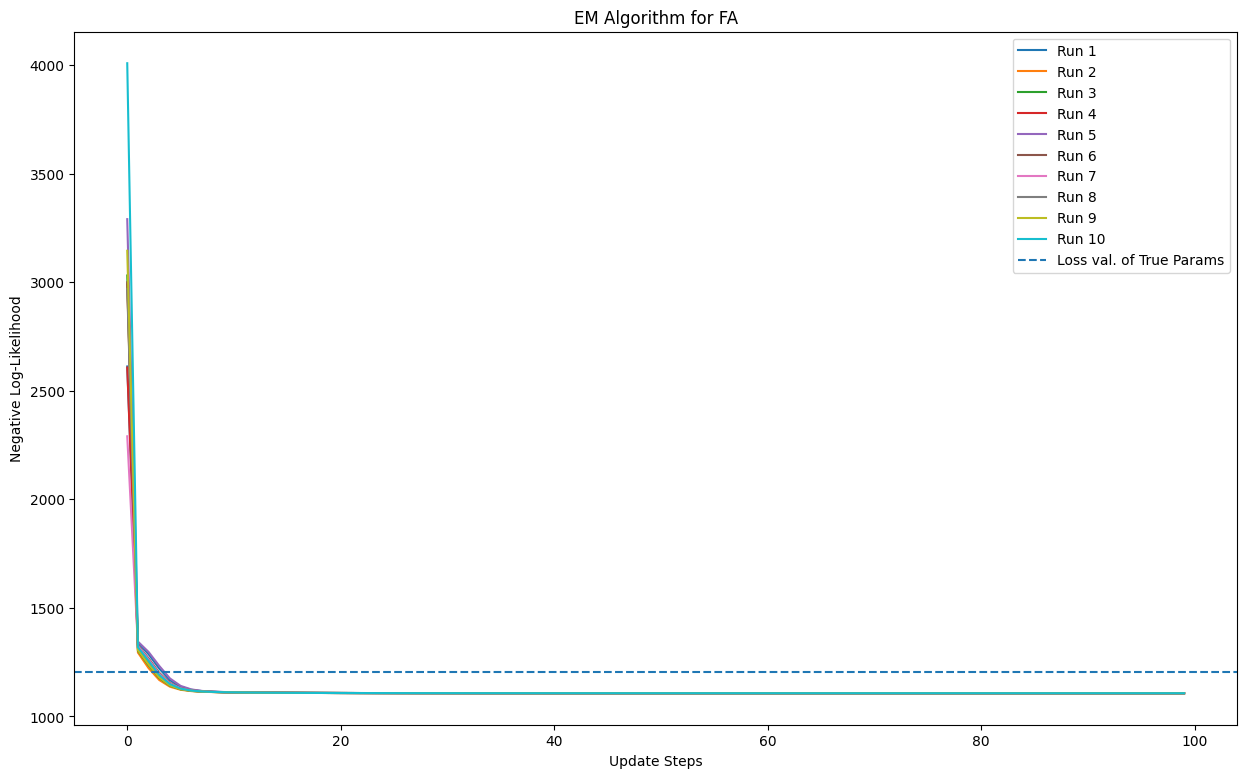

In [59]:
U_true = np.random.uniform(-3, 4, (m, l))
psi_true = np.random.uniform(1, 4, m)
y = np.random.normal(0, 1, l)
epsilon = np.random.multivariate_normal(np.zeros(m), np.diag(psi_true), n)
X = U_true @ y + epsilon

losses_all_runs = []
for run in range(10):
    U = np.random.uniform(-0.1, 0.1, (m, l))
    # changing the val. range otherwise there are issues with divide by zero
    psi = np.random.uniform(1, 3, m)

    losses = []
    for update_step in range(100):
        # page 17 in slides
        # E-step
        #for all x_i compute E_y|x_i [y] = U.T (U U.T + Psi)^-1 x_i
        #for all x_i compute E_y|x_i [yy.T] = E_y|x_i [y] @ E_y|x_i [y].T + I - U.T (U U.T + Psi)^-1 U
        # U_Ut_psi = U @ U.T + np.diag(psi)
        # E_y_x = U.T @ np.linalg.inv(U_Ut_psi) @ X.T
        # E_yyT_x = E_y_x @ E_y_x.T + np.eye(l) - U.T @ np.linalg.inv(U_Ut_psi) @ U

        E_y_x = np.zeros((l, n))
        E_yyT_x = np.zeros((l, l))

        for i in range(n):
            x_i = X[i]
            U_Ut_psi = U @ U.T + np.diag(psi)
            E_y_x_i = U.T @ np.linalg.inv(U_Ut_psi) @ x_i
            E_y_x[:, i] = E_y_x_i

            E_yyT_x_i = E_y_x_i @ E_y_x_i.T + np.eye(l) - U.T @ np.linalg.inv(U_Ut_psi) @ U
            E_yyT_x += E_yyT_x_i

        # M-step
        # Update parameters according to:
        # U = ((1/n) sum_i x_i E_y|x_i [y].T) @ ((1 / n) sum_i E_y|x_i [yy.T])^-1
        # Psi = (diag(sum_i x_i x_i.T - x_i E_y|x_i [y].T U.T)) / n
        E_y_x = np.zeros((l, n))
        E_yyT_x = np.zeros((l, l, n))

        for i in range(n):
            x_i = X[i]
            U_Ut_psi = U @ U.T + np.diag(psi)
            E_y_x_i = U.T @ np.linalg.inv(U_Ut_psi) @ x_i
            E_y_x[:, i] = E_y_x_i

            E_yyT_x_i = np.outer(E_y_x_i, E_y_x_i) + np.eye(l) - U.T @ np.linalg.inv(U_Ut_psi) @ U
            E_yyT_x[:, :, i] = E_yyT_x_i

        # Page 87 from Prof. Hochreiter's lecture notes
        U_sum = np.zeros((m, l))
        psi_sum = np.zeros((m, m))

        for i in range(n):
            x_i = X[i]
            E_y_x_i = E_y_x[:, i]
            E_yyT_x_i_inv = np.linalg.inv(E_yyT_x[:, :, i])

            U_sum += (np.outer(x_i, E_y_x_i.T) @ E_yyT_x_i_inv)
            psi_sum += (np.outer(x_i, x_i.T)) - (np.outer(x_i, E_y_x_i.T) @ U.T)

        U = (1 / n) * U_sum
        psi = (1 / n) * np.diag(psi_sum)

        loss_sum = []
        for x in X:
            exp_term = np.exp(-1 / 2 * (x.T @ np.linalg.inv(U_Ut_psi) @ x))
            loss = -np.log((2 * np.pi) ** (-m / 2) * abs(np.linalg.det(U_Ut_psi)) ** (-1 / 2) * exp_term)
            loss_sum.append(loss)

        losses.append(np.sum(loss_sum))

    losses_all_runs.append(losses)

plt.figure(figsize=(15, 9))
for losses in losses_all_runs:
    plt.plot(losses)

U_Ut_psi_true = U_true @ U_true.T + np.diag(psi_true)

loss_sum = []
for x in X:
    exp_term = np.exp(-1 / 2 * (x.T @ np.linalg.inv(U_Ut_psi_true) @ x))
    loss = -np.log((2 * np.pi) ** (-m / 2) * abs(np.linalg.det(U_Ut_psi_true)) ** (-1 / 2) * exp_term)
    loss_sum.append(loss)

plt.axhline(y=np.sum(loss_sum), linestyle='--')
plt.legend(['Run ' + str(i) for i in range(1, 11)] + ['Loss val. of True Params'])
plt.xlabel('Update Steps')
plt.ylabel('Negative Log-Likelihood')
plt.title('EM Algorithm for FA')
plt.show()